#### Import libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('HousingData.csv')

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [22]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
df.fillna(df.mean(), inplace=True)

In [24]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
df.shape

(506, 14)

In [26]:
# for i in df.columns:
#   df[i].replace([np.nan], df[i].mean(), inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(506, 14)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.shape

(506, 14)

In [9]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [10]:
## Normalization
#mean = X_train.mean(axis=0)
#std = X_train.std(axis=0)

#X_train = (X_train - mean) / std
#X_test = (X_test - mean) / std

#### Building model

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 2s 48ms/step - loss: 223.0921 - mae: 12.2906 - val_loss: 138.9556 - val_mae: 8.0020
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 120.6532 - mae: 8.8290 - val_loss: 135.6049 - val_mae: 7.8373
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 84.8056 - mae: 7.2766 - val_loss: 129.0313 - val_mae: 7.4942
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 71.4570 - mae: 6.5785 - val_loss: 113.1847 - val_mae: 6.6154
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 66.7203 - mae: 6.0848 - val_loss: 93.2458 - val_mae: 6.4683
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 60.9294 - mae: 5.7595 - val_loss: 93.4506 - val_mae: 6.5035
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 64.1114 - mae: 5.7225 - val_loss: 92.6658 - val_mae: 6.7240
Epoch 8/100
11/11 [==============================] - 0s 6ms/s

11/11 [==============================] - 0s 5ms/step - loss: 26.9468 - mae: 3.7216 - val_loss: 64.6309 - val_mae: 6.2708
Epoch 63/100
11/11 [==============================] - 0s 10ms/step - loss: 35.8230 - mae: 4.3819 - val_loss: 84.7076 - val_mae: 6.3056
Epoch 64/100
11/11 [==============================] - 0s 10ms/step - loss: 32.7003 - mae: 4.3733 - val_loss: 64.5844 - val_mae: 5.6934
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 28.1616 - mae: 3.8133 - val_loss: 63.5109 - val_mae: 5.6177
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 28.9553 - mae: 3.9010 - val_loss: 86.6372 - val_mae: 6.3728
Epoch 67/100
11/11 [==============================] - 0s 5ms/step - loss: 27.6922 - mae: 3.7960 - val_loss: 66.9529 - val_mae: 5.6673
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 26.6414 - mae: 3.6764 - val_loss: 73.6724 - val_mae: 5.7492
Epoch 69/100
11/11 [==============================] - 0s 5ms/step - loss:

In [19]:
# fig = go.Figure()
# fig.add_trace(go.Scattergl(y=history.history['loss'],
#                     name='Train'))

# fig.add_trace(go.Scattergl(y=history.history['val_loss'],
#                     name='Valid'))


# fig.update_layout(height=500, width=700,
#                   xaxis_title='Epoch',
#                   yaxis_title='Loss')
# fig.show()

In [34]:
# np.set_printoptions(suppress=True)
y_pred = model.predict(X_test)


5/5 [==============================] - 0s 3ms/step


In [29]:
from sklearn.metrics import r2_score
mse_nn, mae_nn= model.evaluate(X_test, y_test)
r2 = r2_score(y_test, y_pred)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)
print('Accuracy:', r2*100)

5/5 [==============================] - 0s 6ms/step - loss: 31.1042 - mae: 3.7565
Mean squared error on test data:  31.104171752929688
Mean absolute error on test data:  3.7564918994903564
Accuracy: 61.51811548972817


In [33]:
# y_pred = np.zeros(len(result))
# for i, score in enumerate(result):
#     y_pred[i] = np.round(score)

In [35]:
mae = mean_absolute_error(y_pred, y_test)

In [36]:
mae

3.756491858139634

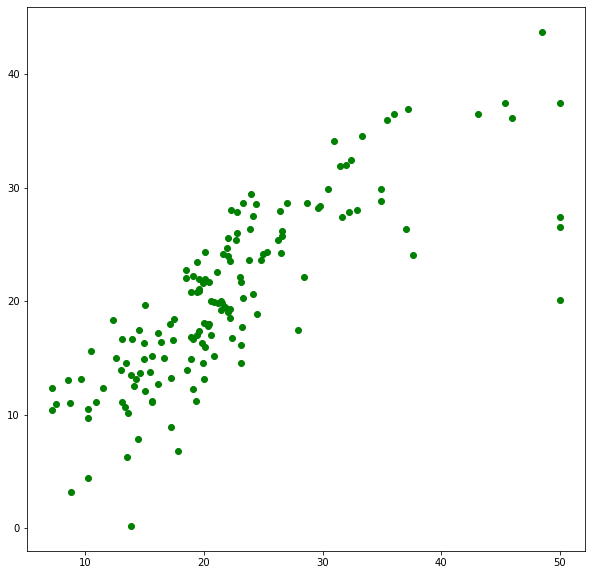

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')